In [7]:
import tensorflow as tf
from model import AutoEncoder

# MNIST Dataset

## Dense AutoEncoder

In [ ]:
# load mnist dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape data
x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((len(x_test), x_test.shape[1] * x_test.shape[2]))

# convert data to tensor
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
auto_encoder = AutoEncoder(x_train.shape[1])

auto_encoder.build(neurons=[128, 64], encoding_shape=49, activation="relu")

auto_encoder.compile(optimizer="adam", loss="mse")

auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 encoder_0 (Dense)           (None, 128)               100480    
                                                                 
 encoder_1 (Dense)           (None, 64)                8256      
                                                                 
 bottlenck (Dense)           (None, 49)                3185      
                                                                 
 decoder_0 (Dense)           (None, 64)                3200      
                                                                 
 decoder_1 (Dense)           (None, 128)               8320      
                                                                 
 decode_output (Dense)       (None, 784)               1011

In [ ]:
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.0281 - val_loss: 0.0208
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0198 - val_loss: 0.0183
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0179 - val_loss: 0.0169
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0167 - val_loss: 0.0159
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160 - val_loss: 0.0157
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0155 - val_loss: 0.0151
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0151 - val_loss: 0.0148
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - val_loss: 0.0146
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

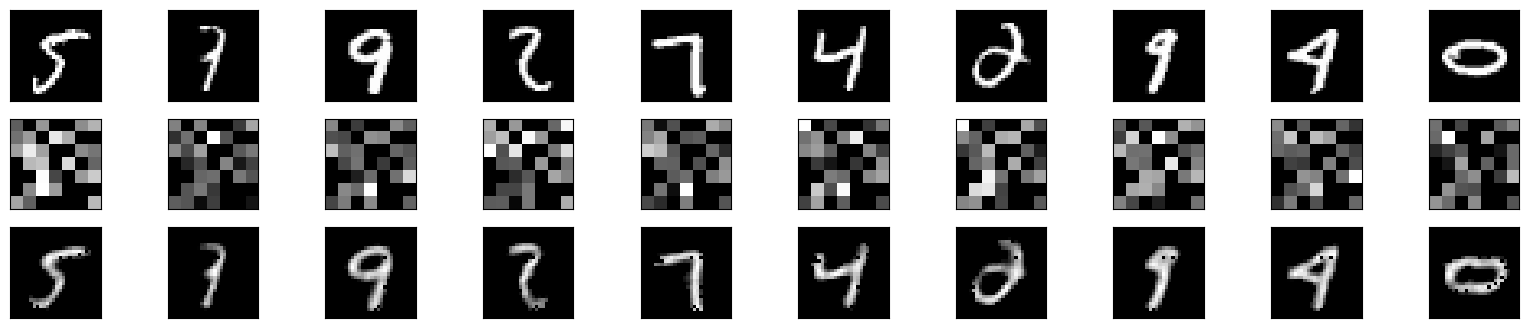

In [ ]:
shuffled_images = tf.random.shuffle(x_test)
random_images = tf.slice(shuffled_images, [0, 0], [10, -1])
auto_encoder.evaluate(random_images, (28,28), (7,7), plot=True)

## Convolutional AutoEncoder

In [ ]:
# load mnist dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape data
x_train = x_train.reshape((len(x_train), x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((len(x_test), x_test.shape[1], x_test.shape[2], 1))

# convert data to tensor
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)


In [ ]:
auto_encoder = AutoEncoder(input_shape = x_train.shape[1:])

auto_encoder.build(filters=[32, 64], activation="relu", encoding_depth=128)

auto_encoder.compile(optimizer="adam", loss="mse")

auto_encoder.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 encoder_0_Conv1 (Conv2D)    (None, 28, 28, 32)        320       
                                                                 
 encoder_0_Conv2 (Conv2D)    (None, 28, 28, 32)        9248      
                                                                 
 encoder_0_MaxPool (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 encoder_1_Conv1 (Conv2D)    (None, 14, 14, 64)        18496     
                                                                 
 encoder_1_Conv2 (Conv2D)    (None, 14, 14, 64)        36928     
                                                          

In [ ]:
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_data=(x_test, x_test), verbose=1)

Epoch 1/10
938/938 [==============================] - 14s 10ms/step - loss: 0.0067 - val_loss: 0.0021
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0010 - val_loss: 8.8113e-04
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 8.8277e-04 - val_loss: 8.2124e-04
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 7.7817e-04 - val_loss: 7.0283e-04
Epoch 8/10
938/938 [==============================] - 9s 10ms/step - loss: 7.0121e-04 - val_loss: 6.0966e-04
Epoch 9/10
938/938 [==============================] - 9s 10ms/step - loss: 6.2986e-04 - val_loss: 5.8381e-04
Epoch 10/10
938/938 [==============================] 

- Here we can see that convolutional autoencoder have almost half of the parameters and is much better than the Dense autoencoder in comparision to loss also.

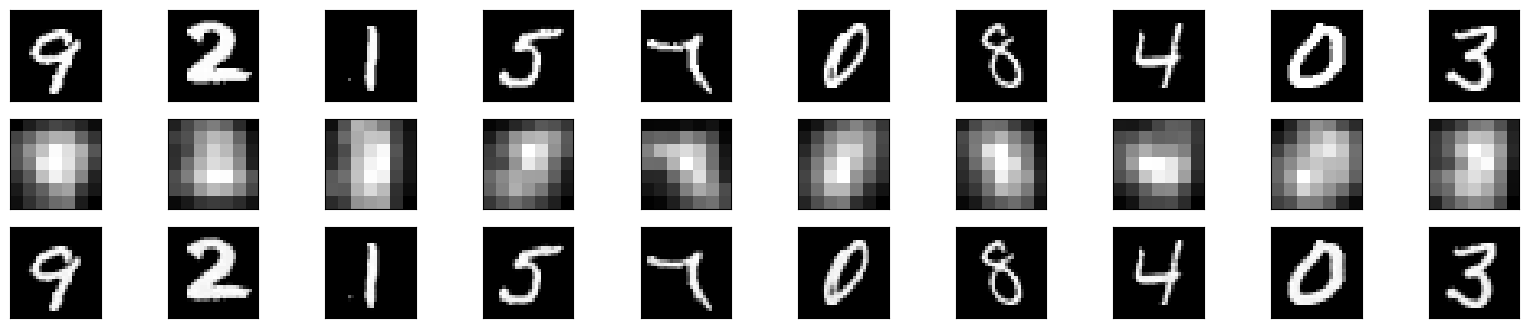

In [ ]:
shuffled_images = tf.random.shuffle(x_test)
random_images = tf.slice(shuffled_images, [0, 0,0,0], [10, -1,-1,-1])
auto_encoder.evaluate(random_images, (28,28,1), (7,7,1), plot=True)

- As in case on connvolution autoencoder, the shape of encoded_image isn't possible to plot as it has more than 3 channels. So here I have plotted the avaerage of all the channel.

# CIFAR10 Dataset

In [8]:
import tensorflow.keras.datasets as tfds

## Dense AutoEncoder

In [20]:
# load mnist dataset
(x_train, _), (x_test, _) = tfds.cifar10.load_data()

# normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape data
x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2] * x_train.shape[3] ))
x_test = x_test.reshape((len(x_test), x_test.shape[1] * x_test.shape[2] * x_test.shape[3]))

# convert data to tensor
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)

In [21]:
auto_encoder = AutoEncoder(x_train.shape[1])

auto_encoder.build(neurons=[768, 192, 96], encoding_shape=48, activation="relu")

auto_encoder.compile(optimizer="adam", loss="mse")

auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 encoder_0 (Dense)           (None, 768)               2360064   
                                                                 
 encoder_1 (Dense)           (None, 192)               147648    
                                                                 
 encoder_2 (Dense)           (None, 96)                18528     
                                                                 
 bottlenck (Dense)           (None, 48)                4656      
                                                                 
 decoder_0 (Dense)           (None, 96)                4704      
                                                                 
 decoder_1 (Dense)           (None, 192)               1862

In [22]:
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test), verbose=1)

Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 0.0301 - val_loss: 0.0214
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0179 - val_loss: 0.0172
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0162 - val_loss: 0.0164
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0158 - val_loss: 0.0161
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0155 - val_loss: 0.0159
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.01

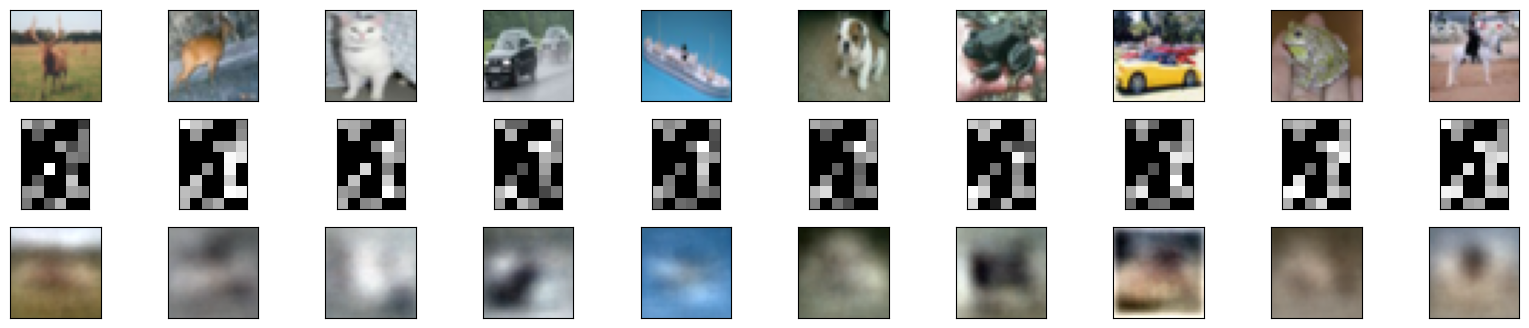

In [27]:
shuffled_images = tf.random.shuffle(x_test)
random_images = tf.slice(shuffled_images, [0, 0], [10, -1])
auto_encoder.evaluate(random_images, (32,32,3), (8,6), plot=True)

## Conv AutoEncoder

In [28]:
# load mnist dataset
(x_train, _), (x_test, _) = tfds.cifar10.load_data()

# normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape data
# x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2] * x_train.shape[3] ))
# x_test = x_test.reshape((len(x_test), x_test.shape[1] * x_test.shape[2] * x_test.shape[3]))

# convert data to tensor
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)

In [31]:
auto_encoder = AutoEncoder(input_shape = x_train.shape[1:])

auto_encoder.build(filters=[32, 64], activation="relu", encoding_depth=128)

auto_encoder.compile(optimizer="adam", loss="mse")

auto_encoder.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 encoder_0_Conv1 (Conv2D)    (None, 32, 32, 32)        896       
                                                                 
 encoder_0_Conv2 (Conv2D)    (None, 32, 32, 32)        9248      
                                                                 
 encoder_0_MaxPool (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 encoder_1_Conv1 (Conv2D)    (None, 16, 16, 64)        18496     
                                                                 
 encoder_1_Conv2 (Conv2D)    (None, 16, 16, 64)        36928     
                                                          

In [32]:
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=64, validation_data=(x_test, x_test), verbose=1)

Epoch 1/10
782/782 [==============================] - 18s 13ms/step - loss: 0.0099 - val_loss: 0.0044
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/10
782/782 [==============================] - 9s 12ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/10
782/782 [==============================] - 9s 12ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 10/10
782/782 [==============================] - 9s 12ms/step - loss: 0.0016 - v

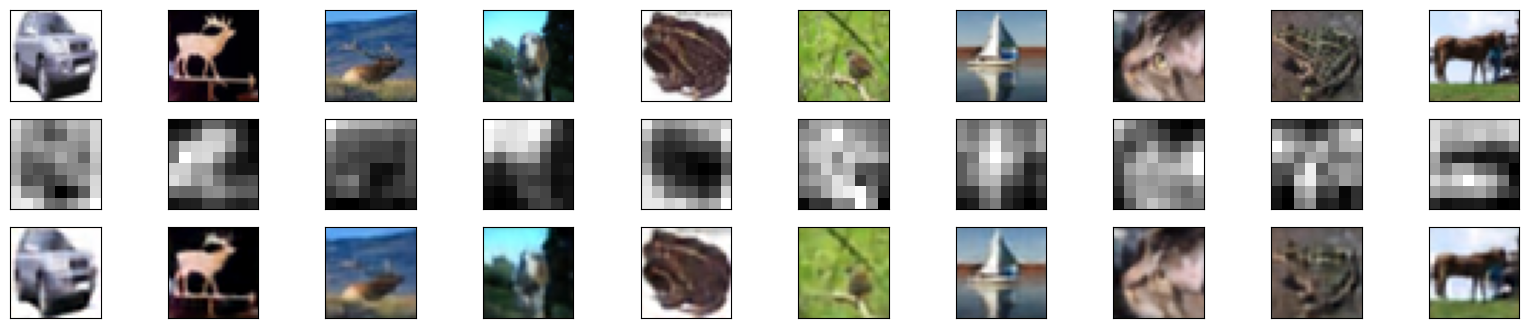

In [33]:
shuffled_images = tf.random.shuffle(x_test)
random_images = tf.slice(shuffled_images, [0, 0,0,0], [10, -1,-1,-1])
auto_encoder.evaluate(random_images, (32,32,3), (8,8,1), plot=True)